# Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,power_transform
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Importing all the collected data from the websites

In [3]:
d1=pd.read_excel(r'delhiblr1.xlsx')
d2=pd.read_excel(r'delhimum1.xlsx')
d3=pd.read_excel(r'delhiother1.xlsx')
d4=pd.read_excel(r'ccu_full1.xlsx')
d5=pd.read_excel(r'maaflight1.xlsx')
d6=pd.read_excel(r'bangalore1.xlsx')
d7=pd.read_excel(r'mumbai1.xlsx')

# I have used concatenation to merge the datasets on top of another

In [4]:
dataset = pd.concat([d1,d2,d3,d4,d5,d6,d7], axis = 0, ignore_index = True)
dataset.head()

,Unnamed: 0,airlines,departure,duration,stops,from_city,to_city,price,journey_date,fclass
0,0,Go First,19:45,2h 35m,Non Stop,New Delhi,Bangalore,7424,2021-10-28,Economy
1,1,Go First,22:45,9h 00m,1 Stop,New Delhi,Bangalore,7424,2021-10-28,Economy
2,2,Go First,21:30,10h 15m,1 Stop,New Delhi,Bangalore,7424,2021-10-28,Economy
3,3,Vistara,20:40,2h 40m,Non Stop,New Delhi,Bangalore,7425,2021-10-28,Economy
4,4,SpiceJet,21:50,2h 45m,Non Stop,New Delhi,Bangalore,7425,2021-10-28,Economy


# Looking at the amount of data available in the combined dataset

In [5]:
dataset.shape

(28830, 10)

There are 28830 rows and 10 columns in the dataset

In [6]:
dataset = dataset.drop(columns = 'Unnamed: 0')
dataset.head()

,airlines,departure,duration,stops,from_city,to_city,price,journey_date,fclass
0,Go First,19:45,2h 35m,Non Stop,New Delhi,Bangalore,7424,2021-10-28,Economy
1,Go First,22:45,9h 00m,1 Stop,New Delhi,Bangalore,7424,2021-10-28,Economy
2,Go First,21:30,10h 15m,1 Stop,New Delhi,Bangalore,7424,2021-10-28,Economy
3,Vistara,20:40,2h 40m,Non Stop,New Delhi,Bangalore,7425,2021-10-28,Economy
4,SpiceJet,21:50,2h 45m,Non Stop,New Delhi,Bangalore,7425,2021-10-28,Economy


I have removed the unnecessary column from the dataset, now there are 9 features

In [7]:
dataset['hour'] = dataset['duration'].str.split(' ', expand = True)[0]
dataset['minute'] = dataset['duration'].str.split(' ', expand = True)[1]

# Converting the duration column into minutes, First we split the string using 'space' as a reference.

In [8]:
dataset.head()

,airlines,departure,duration,stops,from_city,to_city,price,journey_date,fclass,hour,minute
0,Go First,19:45,2h 35m,Non Stop,New Delhi,Bangalore,7424,2021-10-28,Economy,2h,35m
1,Go First,22:45,9h 00m,1 Stop,New Delhi,Bangalore,7424,2021-10-28,Economy,9h,00m
2,Go First,21:30,10h 15m,1 Stop,New Delhi,Bangalore,7424,2021-10-28,Economy,10h,15m
3,Vistara,20:40,2h 40m,Non Stop,New Delhi,Bangalore,7425,2021-10-28,Economy,2h,40m
4,SpiceJet,21:50,2h 45m,Non Stop,New Delhi,Bangalore,7425,2021-10-28,Economy,2h,45m


Splitting the departure column into departure hour and minute using ':' as reference

In [9]:
dataset['dep_hour'] = dataset['departure'].str.split(':', expand = True)[0]
dataset['dep_minute'] = dataset['departure'].str.split(':', expand = True)[1]

Dropping hthe departure column as we have already extracted feature from it

In [10]:
dataset = dataset.drop(columns = ['departure','duration'])

I'm converting the duration to minutes by mulitplying 60 to the hour and adding the minutes to it, finally the column duration will be in minutes

In [11]:
dataset['hour'] = pd.to_numeric(dataset['hour'].str.replace('h',''))
dataset['minute'] = pd.to_numeric(dataset['minute'].str.replace('m',''))

Extracting the day of week from the journey date function

In [12]:
dataset['journey_date'] = pd.to_datetime(dataset['journey_date'])
dataset['day_of_week'] = dataset['journey_date'].apply(lambda time: time.dayofweek)

In [13]:
dataset.head()

,airlines,stops,from_city,to_city,price,journey_date,fclass,hour,minute,dep_hour,dep_minute,day_of_week
0,Go First,Non Stop,New Delhi,Bangalore,7424,2021-10-28,Economy,2,35,19,45,3
1,Go First,1 Stop,New Delhi,Bangalore,7424,2021-10-28,Economy,9,0,22,45,3
2,Go First,1 Stop,New Delhi,Bangalore,7424,2021-10-28,Economy,10,15,21,30,3
3,Vistara,Non Stop,New Delhi,Bangalore,7425,2021-10-28,Economy,2,40,20,40,3
4,SpiceJet,Non Stop,New Delhi,Bangalore,7425,2021-10-28,Economy,2,45,21,50,3


In [14]:
dataset['duration_in_min'] = (dataset['hour']*60)+dataset['minute']

In [15]:
dataset.drop(columns = ['hour','minute'])

,airlines,stops,from_city,to_city,price,journey_date,fclass,dep_hour,dep_minute,day_of_week,duration_in_min
0,Go First,Non Stop,New Delhi,Bangalore,7424,2021-10-28,Economy,19,45,3,155
1,Go First,1 Stop,New Delhi,Bangalore,7424,2021-10-28,Economy,22,45,3,540
2,Go First,1 Stop,New Delhi,Bangalore,7424,2021-10-28,Economy,21,30,3,615
3,Vistara,Non Stop,New Delhi,Bangalore,7425,2021-10-28,Economy,20,40,3,160
4,SpiceJet,Non Stop,New Delhi,Bangalore,7425,2021-10-28,Economy,21,50,3,165
...,...,...,...,...,...,...,...,...,...,...,...
28825,Vistara Business,1 Stop,Mumbai,Goa,77949,2021-11-13,Business,22,45,5,905
28826,Vistara Business,1 Stop,Mumbai,Goa,78285,2021-11-13,Business,07,30,5,380
28827,Vistara Business,1 Stop,Mumbai,Goa,78285,2021-11-13,Business,19,45,5,1085
28828,Vistara Business,1 Stop,Mumbai,Goa,78285,2021-11-13,Business,18,30,5,1160


Extracting day, month and year from the journey date column

In [16]:
dataset['day'] = dataset['journey_date'].apply(lambda time: time.day)
dataset['month'] = dataset['journey_date'].apply(lambda time: time.month)
dataset['year'] = dataset['journey_date'].apply(lambda time: time.year)

I'm dropping the journey_date feature, because we have extracted all the necessary information from the same

In [17]:
dataset = dataset.drop(columns = 'journey_date')

In [18]:
dataset.shape

(28830, 15)

Extracting the part of day from the hour feature for detailed analysis

In [19]:
dataset['dep_hour'] = dataset['dep_hour'].astype(int)
dataset['dep_minute'] = dataset['dep_minute'].astype(int)

In [20]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [21]:
dataset['session'] = dataset['dep_hour'].apply(f)
dataset.head()

,airlines,stops,from_city,to_city,price,fclass,hour,minute,dep_hour,dep_minute,day_of_week,duration_in_min,day,month,year,session
0,Go First,Non Stop,New Delhi,Bangalore,7424,Economy,2,35,19,45,3,155,28,10,2021,Evening
1,Go First,1 Stop,New Delhi,Bangalore,7424,Economy,9,0,22,45,3,540,28,10,2021,Night
2,Go First,1 Stop,New Delhi,Bangalore,7424,Economy,10,15,21,30,3,615,28,10,2021,Night
3,Vistara,Non Stop,New Delhi,Bangalore,7425,Economy,2,40,20,40,3,160,28,10,2021,Evening
4,SpiceJet,Non Stop,New Delhi,Bangalore,7425,Economy,2,45,21,50,3,165,28,10,2021,Night


After perfrming all the feature engineering steps, I'm checking the shape of the data using head fuction


Visualizing the relationship between the variables and target (price)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

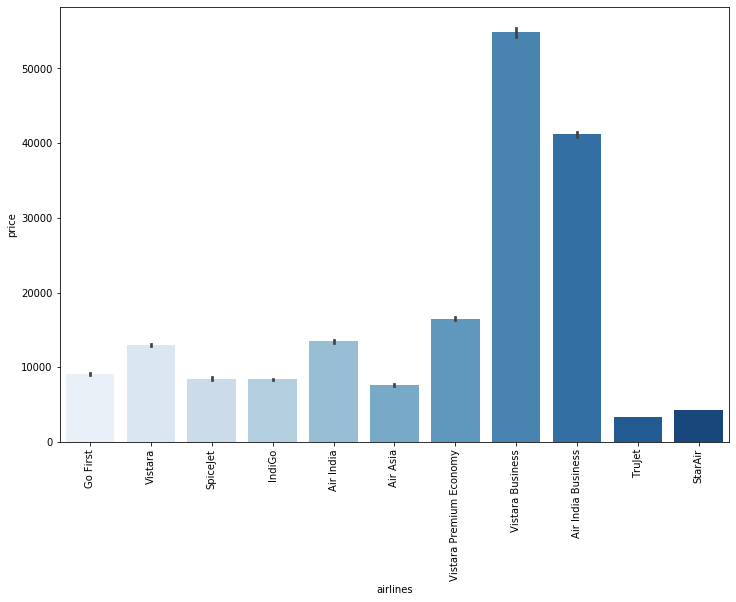

In [22]:
plt.figure(figsize = (12,8))
sns.barplot(x = dataset['airlines'], y = dataset['price'], palette = 'Blues')
plt.xticks(rotation = '90')

From the above analysis, I can say that the Business flights were costly followed by premium economy and economy flights

# Finding the relationship between the number stops to reach a destination and price

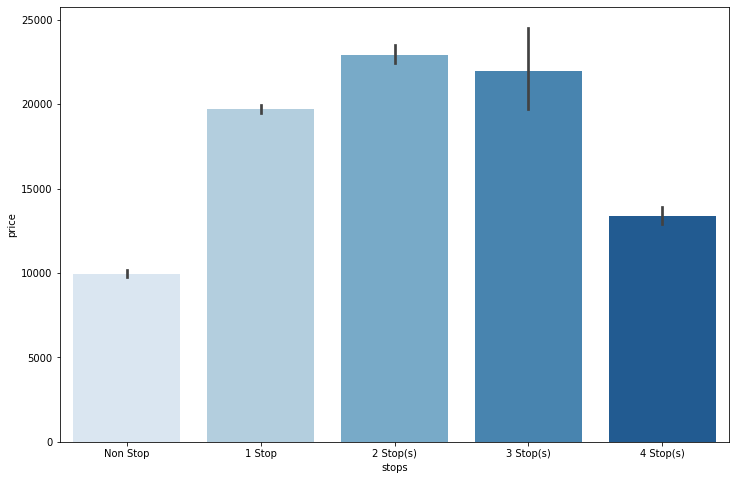

In [23]:
plt.figure(figsize = (12,8))
sns.barplot(x = dataset['stops'], y = dataset['price'], palette = 'Blues')

Upon review, I can see that the nonstop flights and 4 stop flights were cheaper when compared to 1,2 or 3 stops

# Class v/s Price

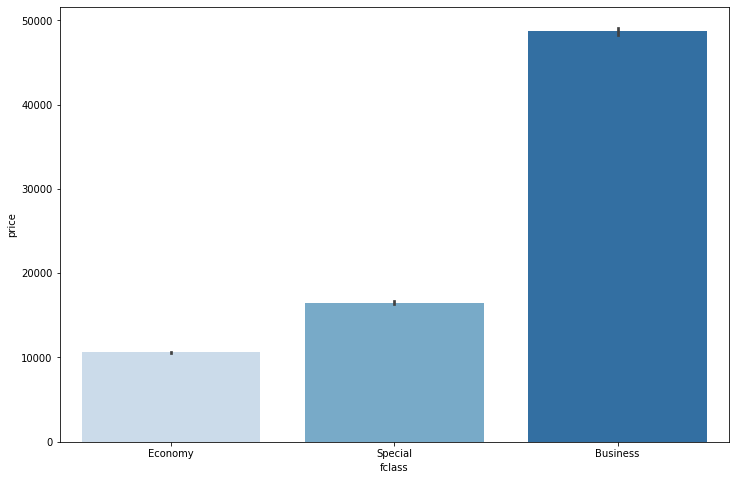

In [25]:
plt.figure(figsize = (12,8))
sns.barplot(x = dataset['fclass'], y = dataset['price'], palette = 'Blues')

As expected the business class were costly when compared to others

# dep_hour v/s price

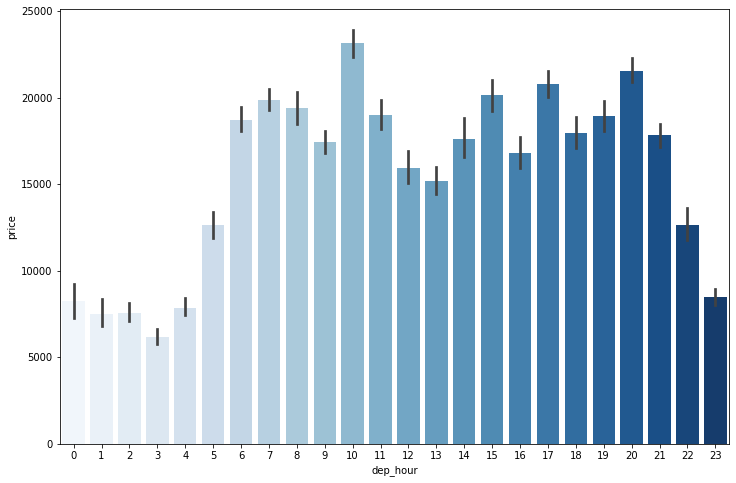

In [26]:
plt.figure(figsize = (12,8))
sns.barplot(x = dataset['dep_hour'], y = dataset['price'], palette = 'Blues')

the flight price were cheaper between 11 PM to 4 AM

# Day of week and price

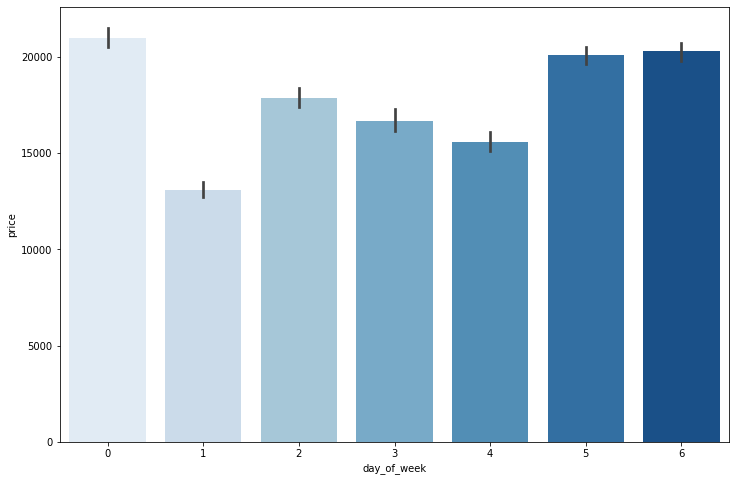

In [27]:
plt.figure(figsize = (12,8))
sns.barplot(x = dataset['day_of_week'], y = dataset['price'], palette = 'Blues')

The flight charges were highest during weekends (Friday, Saturday and Sunday) and cheapest on Mondays

# Flight Duration and price

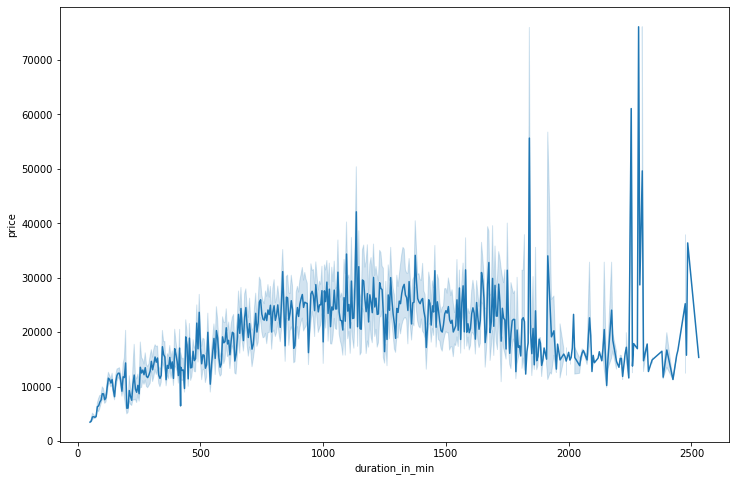

In [28]:
plt.figure(figsize = (12,8))
sns.lineplot(x = dataset['duration_in_min'], y = dataset['price'], palette = 'Blues')

The duration of the flight is also related to the price, here when the flight duration increases, the price also increases

# Session v/s price

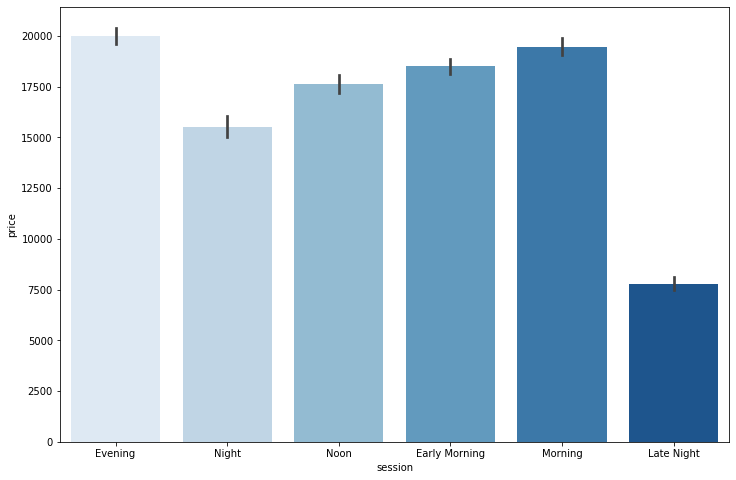

In [29]:
plt.figure(figsize = (12,8))
sns.barplot(x = dataset['session'], y = dataset['price'], palette = 'Blues')

Upon reviewing, I can see that the evening flights were costlier and late night price were cheaper

# Since we have extracted duration in mins from hour and min, I can remove the same from the dataset

In [30]:
dataset = dataset.drop(columns = ['hour', 'minute'])

I'm using ordinal encoder to encode the categorical data

In [31]:
enc = OrdinalEncoder()
for col in dataset:
    if dataset[col].dtypes == 'object':
        dataset[col] =enc.fit_transform(dataset[col].values.reshape(-1,1))

# Checking the data type of the dataset

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28830 entries, 0 to 28829
Data columns (total 14 columns):
airlines           28830 non-null float64
stops              28830 non-null float64
from_city          28830 non-null float64
to_city            28830 non-null float64
price              28830 non-null int64
fclass             28830 non-null float64
dep_hour           28830 non-null int32
dep_minute         28830 non-null int32
day_of_week        28830 non-null int64
duration_in_min    28830 non-null int64
day                28830 non-null int64
month              28830 non-null int64
year               28830 non-null int64
session            28830 non-null float64
dtypes: float64(6), int32(2), int64(6)
memory usage: 2.9 MB


All the data has been converted to numerical type, now we can proceed in further analysis

# Checking for the correlation of the independent variables with the target

In [33]:
corr_data = dataset.corr()
corr_data['price'].sort_values(ascending = False)

price              1.000000
duration_in_min    0.293467
airlines           0.238363
from_city          0.112362
month              0.069922
dep_minute         0.028491
day_of_week        0.021383
dep_hour           0.007818
session           -0.039702
day               -0.089516
to_city           -0.101130
stops             -0.214317
fclass            -0.609827
year                    NaN
Name: price, dtype: float64

Since we have collected data for the same year i.e., for 2021 there won't be any correlation between year and price, hence removing that from the dataset

In [34]:
dataset = dataset.drop(columns = 'year')

# Plotting the heatmap to visualize the correlaion whils checking for multi-collinearity in the dataset

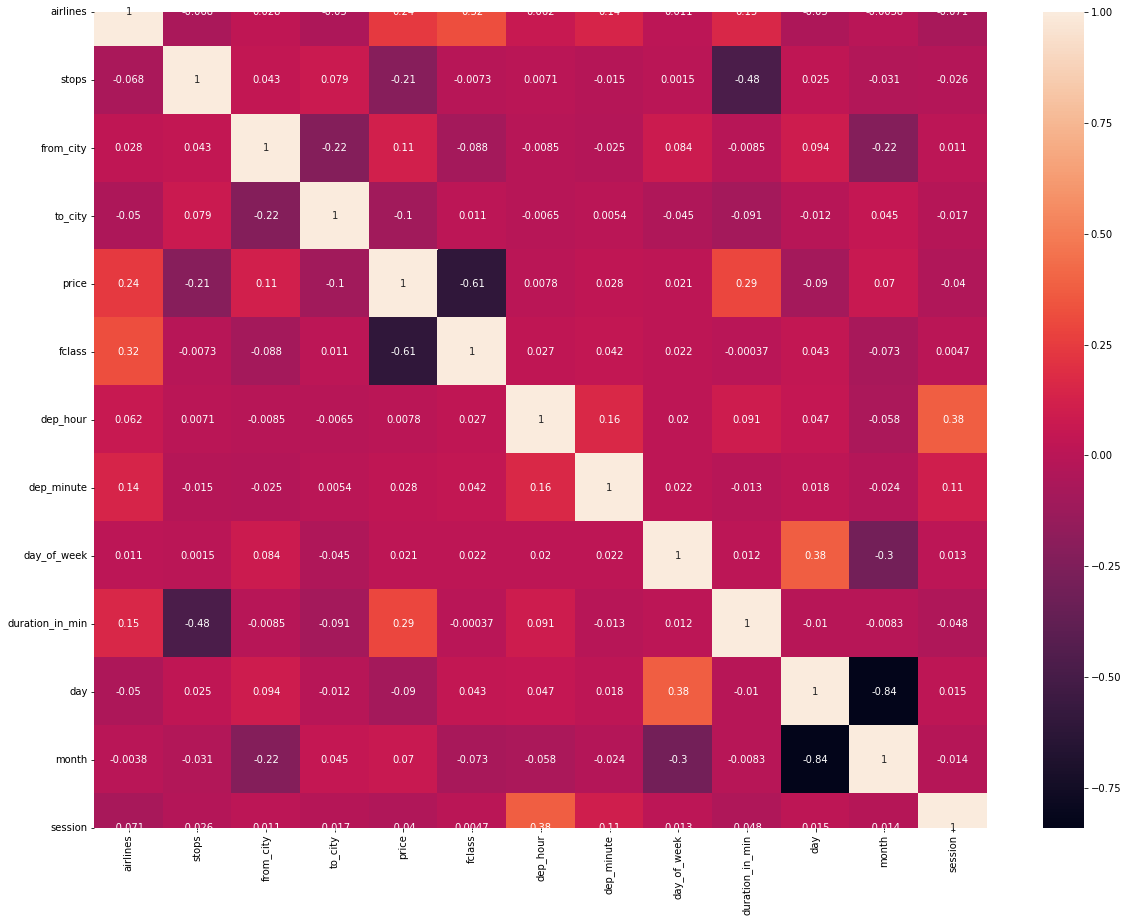

In [35]:
cor = dataset.corr()
plt.figure(figsize = (20,15))
sns.heatmap(cor, annot = True)

As we have visulaized the correlation, I can see that the flight class has highest correlation with the price (-0.61) and the lowest is duration in minutes.

I can also see that the feature day and month are highly correlated with -0.84

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Using boxplot to visualize the presence of outliers

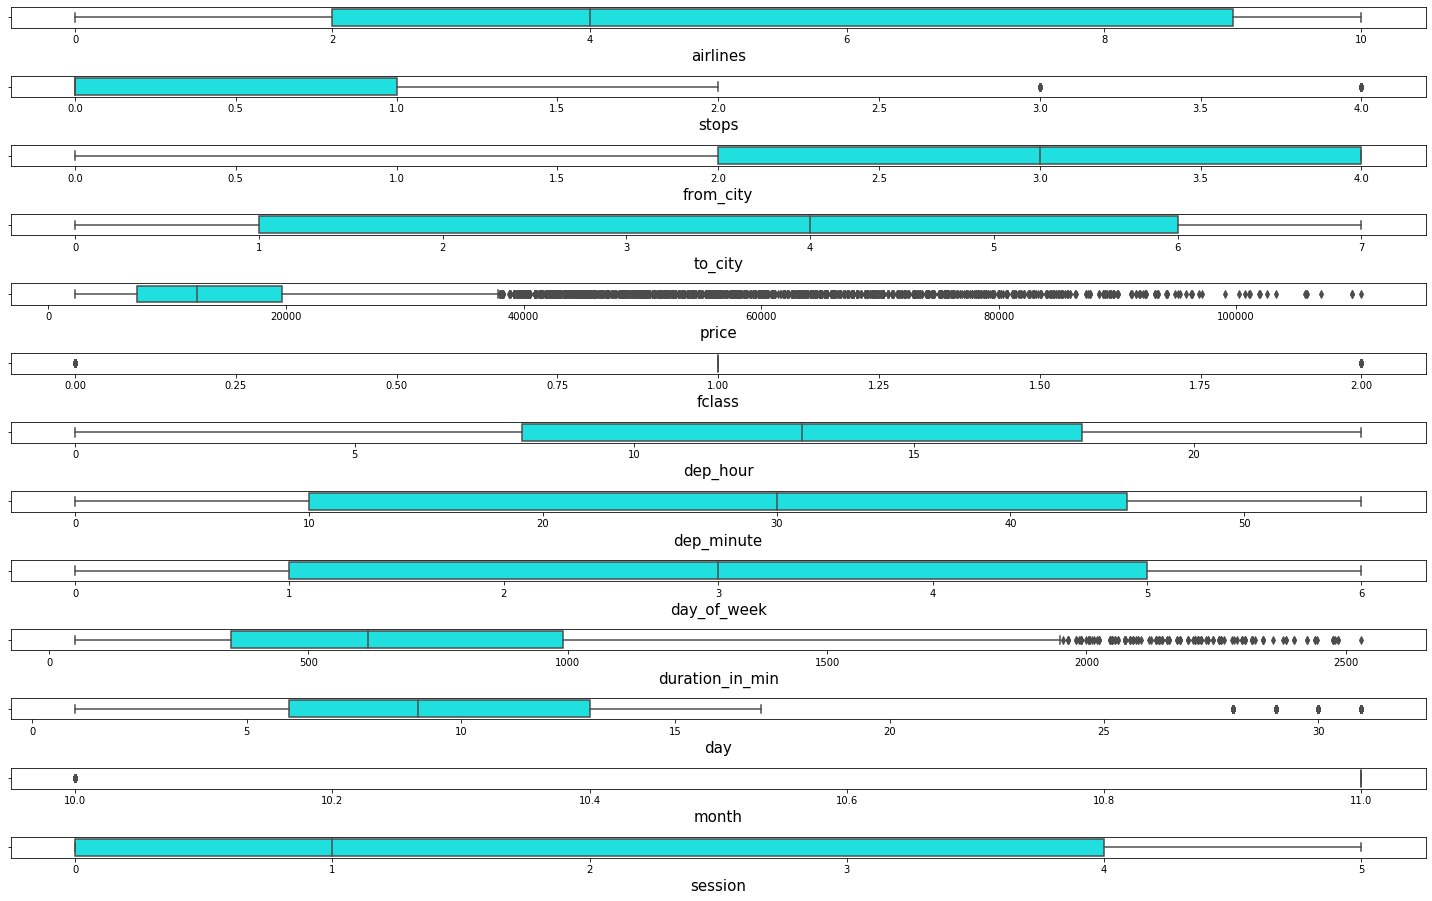

In [37]:
plt.figure(figsize = (20,15))
pltnum = 1
for i in dataset:
    if pltnum<=16:
        plt.subplot(16,1,pltnum)
        sns.boxplot(dataset[i],color = 'cyan')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(dataset[['duration_in_min','price']]))
z.head()

In [40]:
data_new = dataset[(z<2.5).all(axis =1)]
print(data_new.shape)
print(dataset.shape)

(27499, 13)
(28830, 13)


# Checking for skewness in the continuous data variable

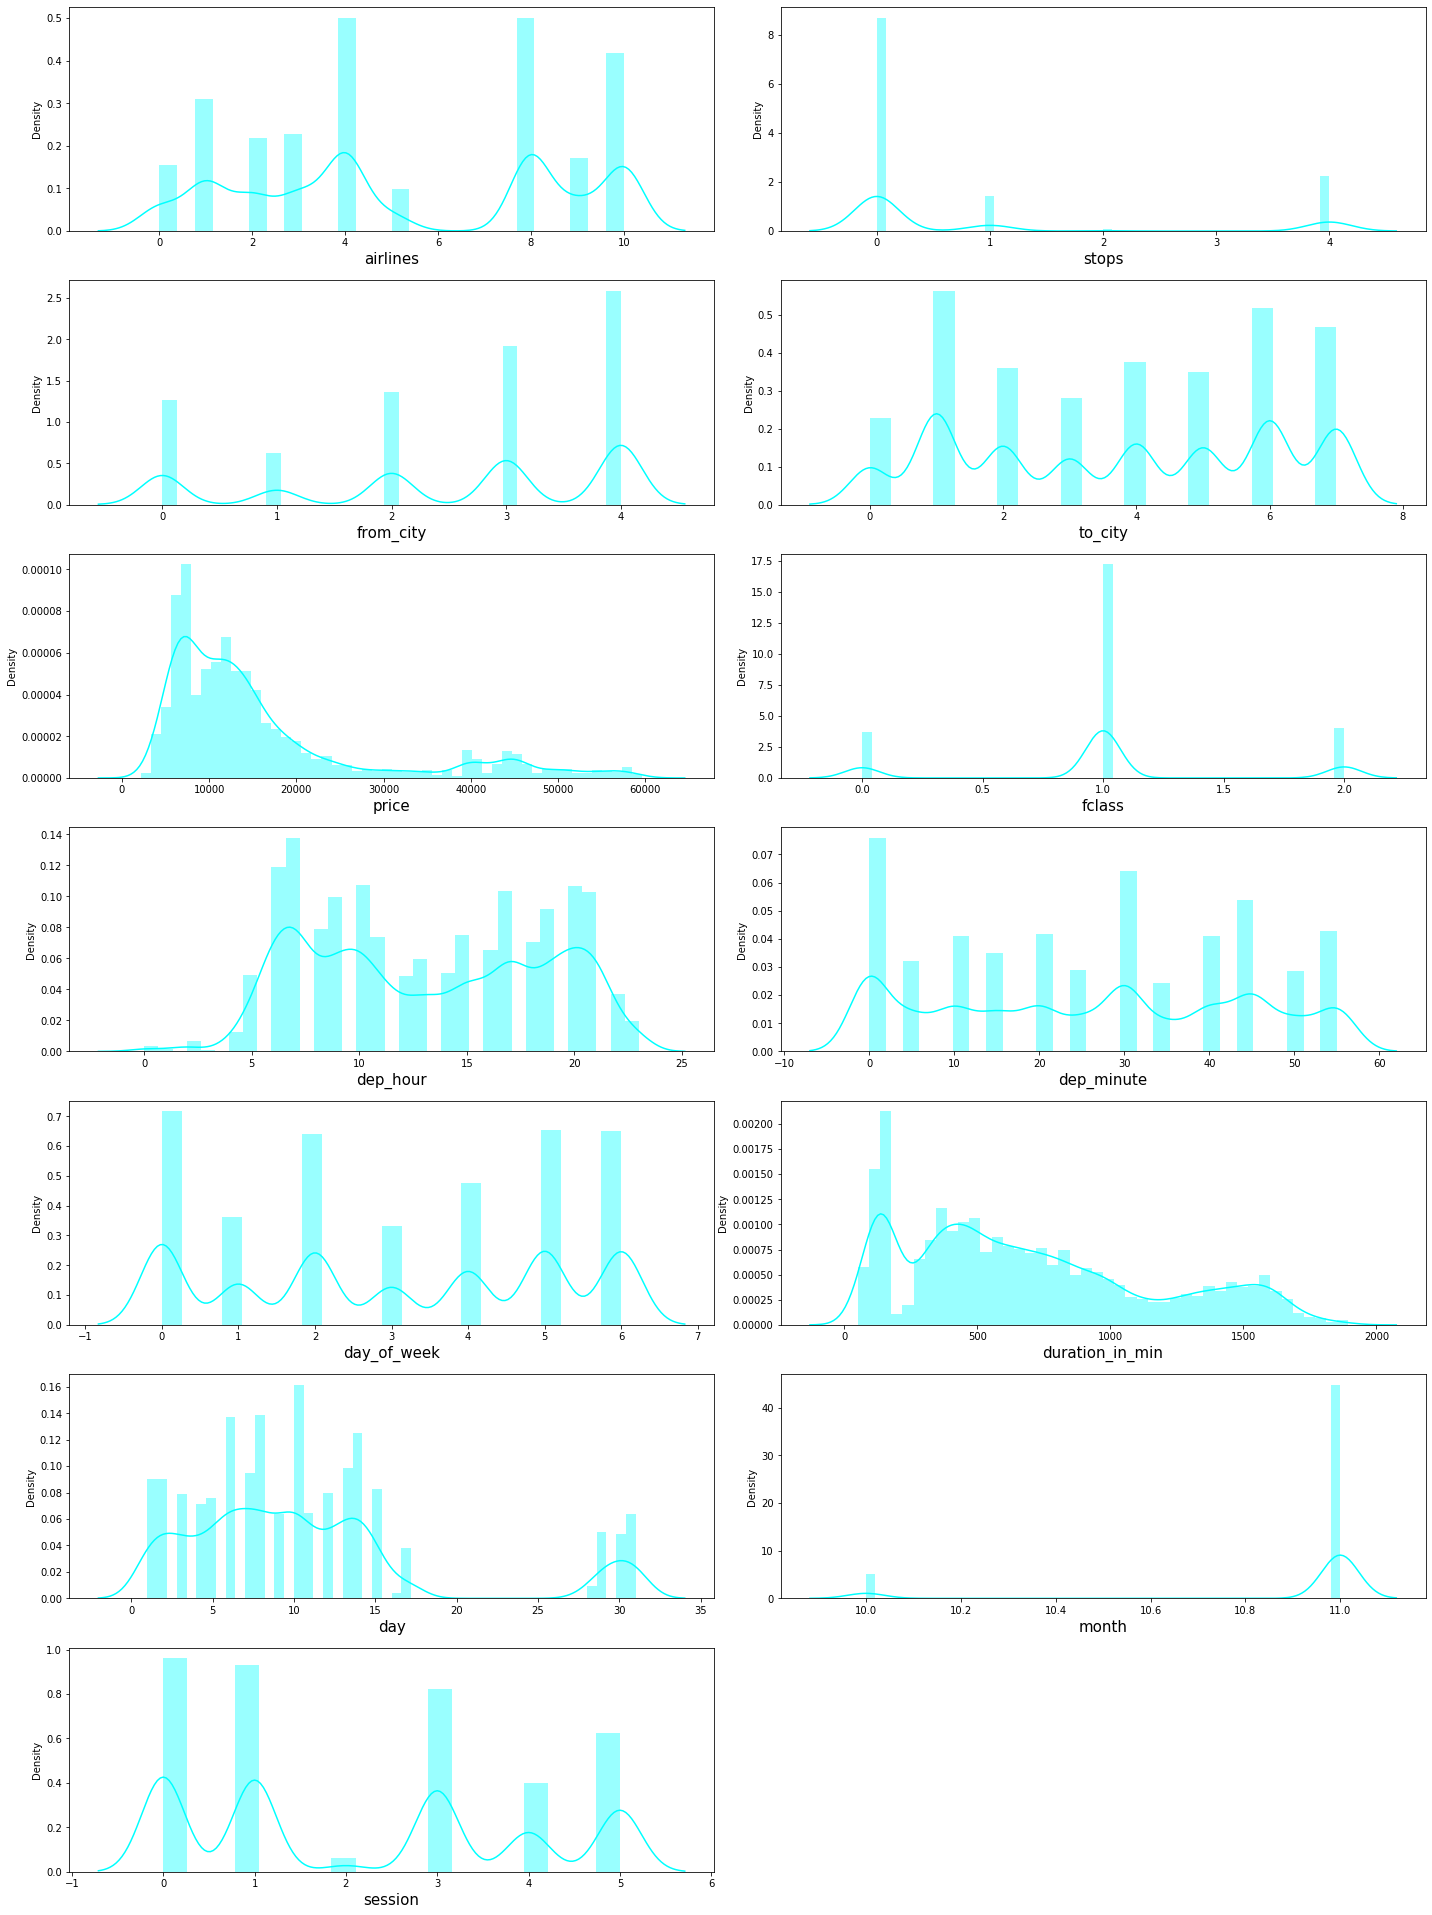

In [41]:
plt.figure(figsize=(20,30))
pltnum = 1
for i in data_new:
    if pltnum <=16:
        plt.subplot(8,2,pltnum)
        sns.distplot(data_new[i],color = 'cyan')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

There is a skewness present in the duration in min variable, once this is fixed we can proceed with further analysis

# Splitting the dataset into x and y and applying the power transformation technique only on the independent variable

In [42]:
x = data_new.drop(columns = 'price')
y = data_new['price']

In [43]:
x.skew()

airlines           0.068872
stops              1.483352
from_city         -0.587191
to_city           -0.069740
fclass             0.004635
dep_hour           0.044502
dep_minute         0.021164
day_of_week       -0.071076
duration_in_min    0.613722
day                1.334588
month             -2.607424
session            0.249862
dtype: float64

In [44]:
tr = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(tr, columns =x.columns)

In [45]:
x.skew()

airlines          -0.179469
stops              0.909934
from_city         -0.396173
to_city           -0.210764
fclass             0.005818
dep_hour          -0.111341
dep_minute        -0.392582
day_of_week       -0.236084
duration_in_min   -0.099181
day               -0.009763
month             -2.607424
session           -0.099549
dtype: float64

# The dataset is automatically scaled we can proceed with building the machine learning model for the dataset

In [46]:
x

,airlines,stops,from_city,to_city,fclass,dep_hour,dep_minute,day_of_week,duration_in_min,day,month,session
0,-0.567707,1.691903,1.101922,-1.193564,-0.021256,1.053921,0.995460,0.057049,-1.392281,1.783758,-2.946650,-0.476382
1,-0.567707,-0.653571,1.101922,-1.193564,-0.021256,1.526833,0.995460,0.057049,-0.115061,1.783758,-2.946650,1.000318
2,-0.567707,-0.653571,1.101922,-1.193564,-0.021256,1.371349,0.348782,0.057049,0.055467,1.783758,-2.946650,1.000318
3,0.832950,1.691903,1.101922,-1.193564,-0.021256,1.213755,0.790249,0.057049,-1.366630,1.783758,-2.946650,-0.476382
4,0.047217,1.691903,1.101922,-1.193564,-0.021256,1.371349,1.192392,0.057049,-1.341476,1.783758,-2.946650,1.000318
...,...,...,...,...,...,...,...,...,...,...,...,...
27494,-0.921093,-0.653571,0.283836,-0.249320,-1.815194,-0.517496,-1.700704,0.904905,1.639225,0.547314,0.339368,0.602522
27495,-0.921093,1.206764,0.283836,-0.249320,-1.815194,-1.120689,-1.138496,0.904905,1.839405,0.547314,0.339368,-1.352945
27496,1.070659,-0.653571,0.283836,-0.249320,-1.815194,-1.336057,-1.700704,0.904905,0.639051,0.547314,0.339368,-1.352945
27497,-0.921093,1.206764,0.283836,-0.249320,-1.815194,1.371349,0.348782,0.904905,0.341729,0.547314,0.339368,1.000318


# Checing for outliers again

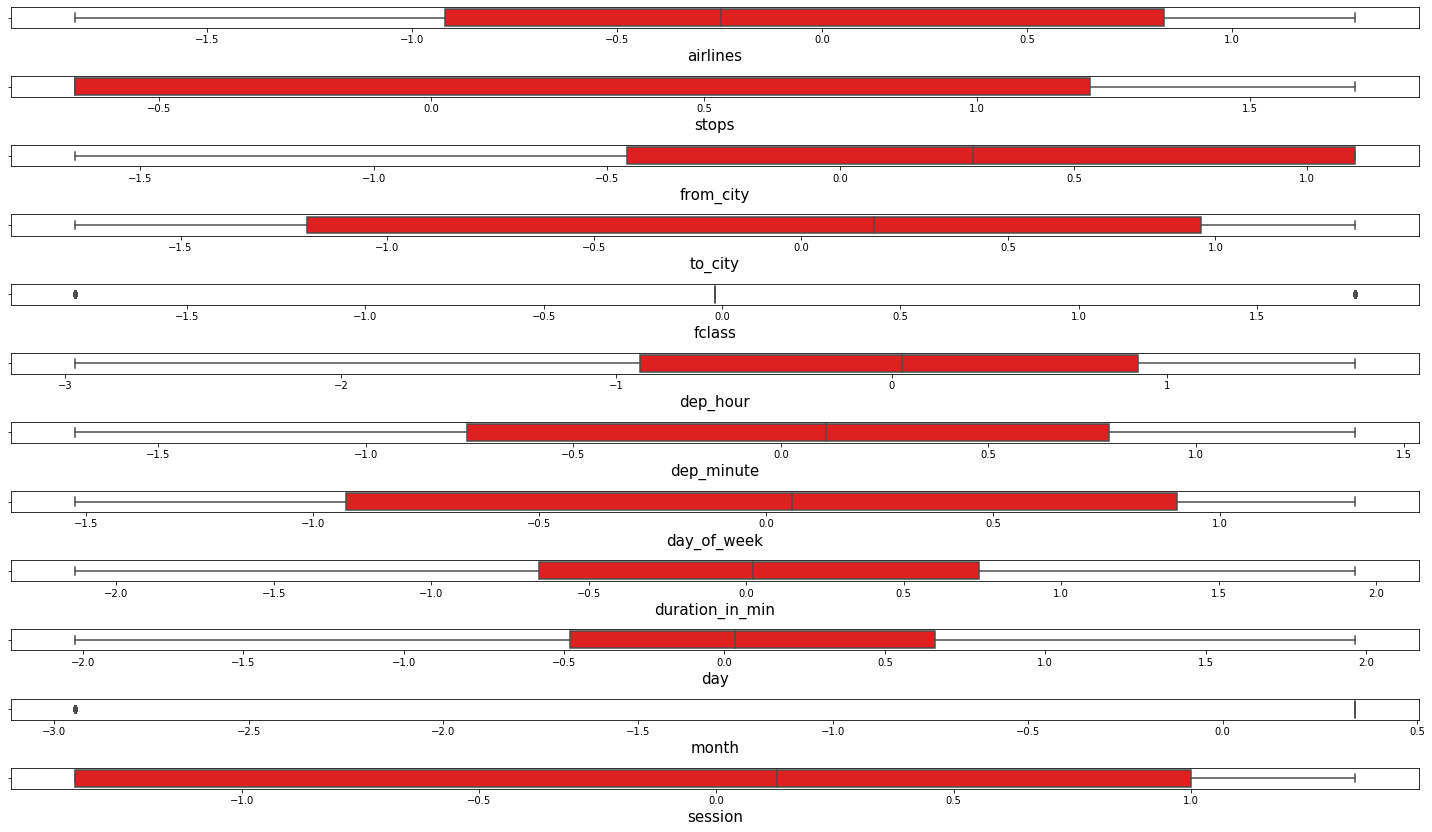

In [47]:
plt.figure(figsize = (20,15))
pltnum = 1
for i in x:
    if pltnum<=16:
        plt.subplot(16,1,pltnum)
        sns.boxplot(x[i],color = 'red')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

# Checking for skewness again

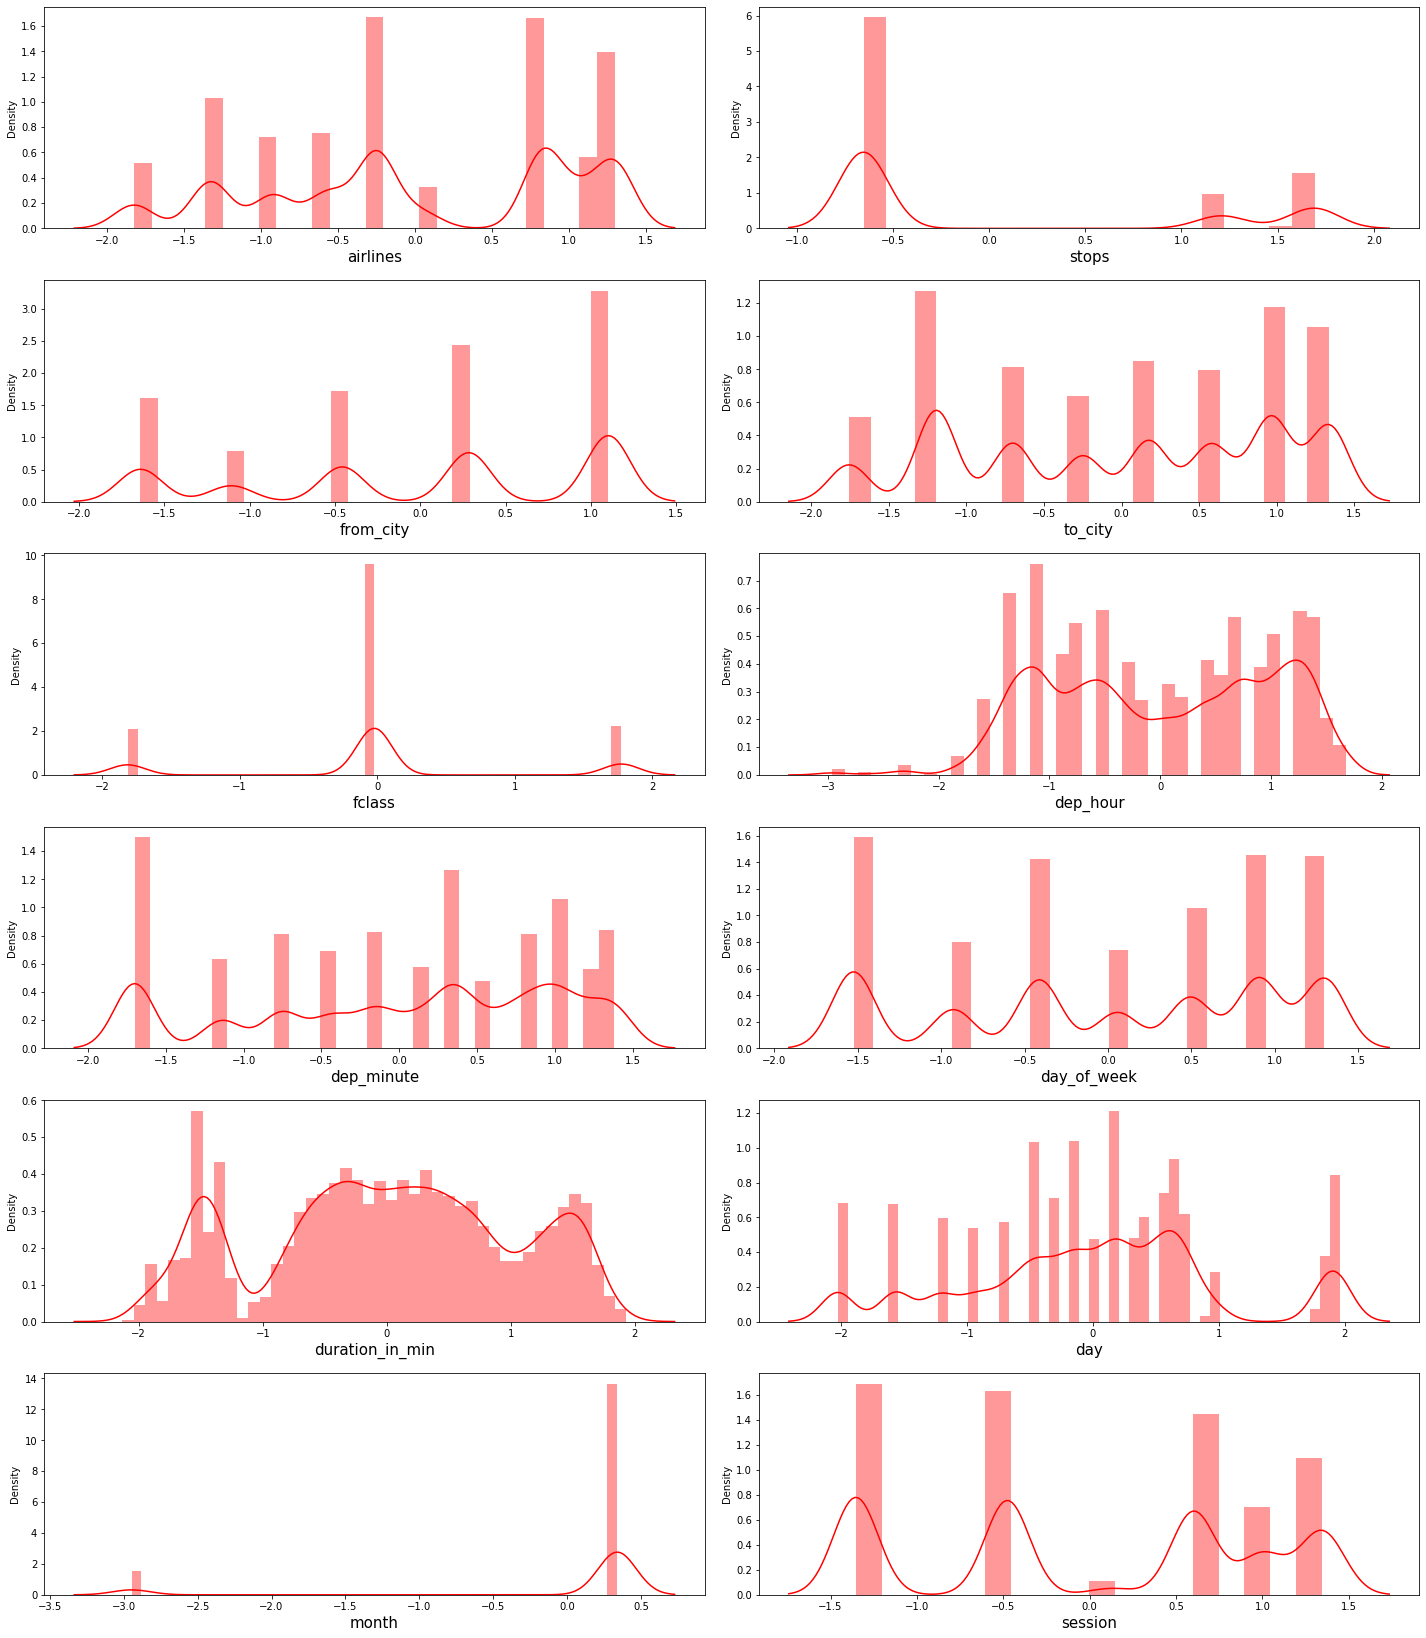

In [48]:
plt.figure(figsize = (20,30))
pltnum = 1
for i in x:
    if pltnum<=16:
        plt.subplot(8,2,pltnum)
        sns.distplot(x[i],color = 'red')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

# Finding the best random state to split the dataset

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
rs = 0
for i in range(0,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size = 0.3)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    tr_score = lr.score(x_train,y_train)
    ts_score = lr.score(x_test,y_test)
    if round(tr_score*100,1) == round(ts_score*100,1):
        if i> rs:
            rs = i
print('the best random state is', rs)

the best random state is 1990


# The best random state is rs, using the same in actual data splitting

In [50]:
x_train,x_test, y_train,y_test = train_test_split(x,y, random_state = rs, test_size = 0.3)

# Model 1: Linear Regression

In [51]:
lin = LinearRegression()
lin.fit(x_train,y_train)
lin_pred = lin.predict(x_test)
lin_score = lin.score(x_test,y_test)
lin_score

0.5662197578742861

In [52]:
lin_rmse = np.sqrt(mean_squared_error(y_test,lin_pred))
print('RMSE for Linear Regression: ', lin_rmse)

RMSE for Linear Regression:  8379.761670537324


# Model 2: Random Forest Regression

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_score = rfr.score(x_test,y_test)
rfr_score

0.9513729426303715

In [54]:
rfr_rmse = np.sqrt(mean_squared_error(y_test,rfr_pred))
print('RMSE for Random Forest Regression: ', rfr_rmse)

RMSE for Random Forest Regression:  2805.6647660987273


# Model 3: Extra Trees Regressor

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = et.score(x_test,y_test)
et_score

0.9556246709199554

In [56]:
et_rmse = np.sqrt(mean_squared_error(y_test,et_pred))
print('RMSE for Extra Trees Regression: ', et_rmse)

RMSE for Extra Trees Regression:  2680.2023086943577


# Model 4: XGB Regressor

In [57]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = xgb.score(x_test,y_test)
xgb_score

0.9446356570952139

In [58]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))
print('RMSE for XGB Regression: ', xgb_rmse)

RMSE for XGB Regression:  2993.724685902187


# Using the cross validation score (r2) to check the overfitting and see that the data is not overfitting much

In [59]:
cv = cross_val_score(lin,x,y,scoring ='r2', cv = 5)
cv = cv.mean()
cv

0.47635819090916254

In [60]:
cv1 = cross_val_score(rfr,x,y,scoring ='r2', cv = 5)
cv1 = cv1.mean()
cv1

0.8538214603798491

In [61]:
cv2 = cross_val_score(et,x,y,scoring ='r2', cv = 5)
cv2= cv2.mean()
cv2

0.8698351054097662

In [62]:
cv3 = cross_val_score(xgb,x,y,scoring ='r2', cv = 5)
cv3= cv3.mean()
cv3

0.8719888083254311

# Finding the best model based on the RMSE value, difference and r2 score

In [63]:
mod = [lin_score,rfr_score,et_score,xgb_score]
cv = [cv,cv1,cv2,cv3]
rmse = [lin_rmse,rfr_rmse,et_rmse,xgb_rmse]

model_sel = pd.DataFrame({})
model_sel['mod'] = mod
model_sel['cv'] = cv
model_sel['rmse'] = rmse
model_sel['diff'] = model_sel['mod'] - model_sel['cv']
model_sel

,mod,cv,rmse,diff
0,0.566220,0.476358,8379.761671,0.089862
1,0.951373,0.853821,2805.664766,0.097551
2,0.955625,0.869835,2680.202309,0.085790
3,0.944636,0.871989,2993.724686,0.072647


I can clearly see that the RMSe is very low for extra trees regressor and the difference int he model score and the cross validation score is 8%. hence selecting the extra trees model as the best model

# Performing the hyper parameter tuning on the best model only

In [64]:
params = {'n_estimators':[150,200,250,350],
         'max_depth':[9,11,13,15],
         'min_samples_split':[3,4,6,8],
         'bootstrap':[True, False]
         }

In [65]:
gcv = GridSearchCV(ExtraTreesRegressor(),params,cv =5, n_jobs = -1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [9, 11, 13, 15],
                         'min_samples_split': [3, 4, 6, 8],
                         'n_estimators': [150, 200, 250, 350]})

In [66]:
gcv.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'min_samples_split': 3,
 'n_estimators': 350}

In [67]:
fnl_mod = ExtraTreesRegressor(bootstrap = False, max_depth = 15, min_samples_split = 3, n_estimators = 350,n_jobs =-1)
fnl_mod.fit(x_train,y_train)
fnl_pred = fnl_mod.predict(x_test)
fnl_score = fnl_mod.score(x_test,y_test)
print(' The R2 score for the hyper tuned model is', fnl_score)

 The R2 score for the hyper tuned model is 0.9516011868995375


In [68]:
fnl_rmse = np.sqrt(mean_squared_error(y_test,fnl_pred))
print('RMSE for KNeighbors Regression: ', fnl_rmse)

RMSE for KNeighbors Regression:  2799.0724474070576


# We have received a r2 score of 0.95 and the RMSE of 2798

# Visualizing the predicted and actual score

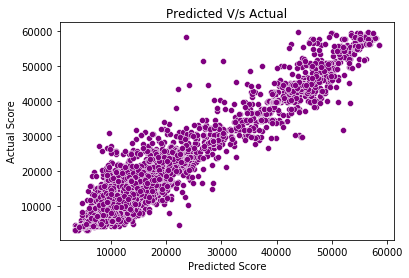

In [69]:
sns.scatterplot(x = fnl_pred, y = y_test, color = 'purple')
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')
plt.title('Predicted V/s Actual')
plt.show()

# Saving the model

In [70]:
import joblib
joblib.dump(fnl_mod, 'flight_price.pkl')

['flight_price.pkl']